<a href="https://colab.research.google.com/github/neddy0318/neddy_space/blob/main/%ED%83%9C%EB%B8%94%EB%A1%9C_%EB%B0%8F_%EC%8B%A4%EC%A0%84%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [120]:
#주가추세 및 향후 1년 시계열 예측 보여주는 함수

def showmetheprophet(corp_name, 원화투자금):
  current_datetime = datetime.now().strftime("%Y-%m-%d")
  corp = yf.download(corp_name, start='2014-03-01', end=current_datetime) #입력 날짜 기준으로 주식 데이터 다운로드
  corp['ds'] = pd.to_datetime(corp.index, format = '%Y-%m-%d')
  corp['y'] = corp['Adj Close']                           #조정 마감가를 y에 할당
  corp = corp[['ds', 'y']]
  #모델 적합
  model_prophet = Prophet(changepoint_prior_scale = 0.15, daily_seasonality = True)
  model_prophet.fit(corp)

  #향후 1년간의 time stamp 생성

  fcast_time = 365 #365일 예측
  corp_forecast = model_prophet.make_future_dataframe(periods = fcast_time, freq = 'D')
  corp_forecast = model_prophet.predict(corp_forecast)
  model_prophet.plot(corp_forecast, xlabel = 'Date', ylabel= 'adj price($)')

  #투자금에 따른 주식 구매량 및 수익률
  #1)입력한 현재 날짜 기준 금액 구하기
  current_price = corp_forecast.query('ds == @current_datetime').iloc[0]['yhat']
  dollor = 원화투자금/1360
  #주문가능 수량 및 잔여금
  amount = dollor//current_price
  purchasable_price = round(amount*current_price, 2)
  residue = round(dollor%current_price,2)
  print("현재 날짜 기준 주문 가능 수량은 약", amount, "개이며, 총", purchasable_price, "달러입니다. 잔여금은", residue, "달러입니다")


  #예상 수익(평균) 및 수익률(평균)
  avg_f_price = corp_forecast.iloc[-1]['yhat']    #yhat칼럼의 맨 마지막 행 값 가져오기
  expected_avg_total_price = round(amount*avg_f_price,2)
  expected_avg_profit = round(expected_avg_total_price-purchasable_price, 2)
  avg_profit_percentage = round((avg_f_price-current_price)/current_price*100, 2)
  print("1년 후 총금액의 예상 평균치는", expected_avg_total_price, '달러이며, 그에 따른 수익은', expected_avg_profit, '입니다. 예상 수익률은', avg_profit_percentage, '% 입니다.' )

  #예상 수익(최대) 및 수익률(최대)
  upper_f_price = corp_forecast.iloc[-1]['yhat_upper']    #yhat칼럼의 맨 마지막 행 값 가져오기
  expected_upper_total_price = round(amount*upper_f_price,2)
  expected_upper_profit = round(expected_upper_total_price-purchasable_price, 2)
  upper_profit_percentage = round((upper_f_price-current_price)/current_price*100, 2)
  print("1년 후 총금액의 예상 최대치는", expected_upper_total_price, '달러이며, 그에 따른 수익은', expected_upper_profit, '입니다. 예상 수익률은', upper_profit_percentage, '% 입니다.' )

  #예상 수익(최저) 및 수익률(최저)
  lower_f_price = corp_forecast.iloc[-1]['yhat_lower']    #yhat칼럼의 맨 마지막 행 값 가져오기
  expected_lower_total_price = round(amount*lower_f_price,2)
  expected_lower_profit = round(expected_lower_total_price-purchasable_price, 2)
  lower_profit_percentage = round((lower_f_price-current_price)/current_price*100, 2)
  print("1년 후 총금액의 예상 최저치는", expected_lower_total_price, '달러이며, 그에 따른 수익은', expected_lower_profit, '입니다. 예상 수익률은', lower_profit_percentage, '% 입니다.' )

[*********************100%%**********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv573vt1y/dnn_6i25.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv573vt1y/bnjpj63k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98822', 'data', 'file=/tmp/tmpv573vt1y/dnn_6i25.json', 'init=/tmp/tmpv573vt1y/bnjpj63k.json', 'output', 'file=/tmp/tmpv573vt1y/prophet_modelwn16satm/prophet_model-20240303113123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


현재 날짜 기준 주문 가능 수량은 약 39.0 개이며, 총 7253.68 달러입니다. 잔여금은 99.26 달러입니다
1년 후 총금액의 예상 평균치는 5611.12 달러이며, 그에 따른 수익은 -1642.56 입니다. 예상 수익률은 -22.64 % 입니다.
1년 후 총금액의 예상 최대치는 8012.17 달러이며, 그에 따른 수익은 758.49 입니다. 예상 수익률은 10.46 % 입니다.
1년 후 총금액의 예상 최저치는 3304.58 달러이며, 그에 따른 수익은 -3949.1 입니다. 예상 수익률은 -54.44 % 입니다.


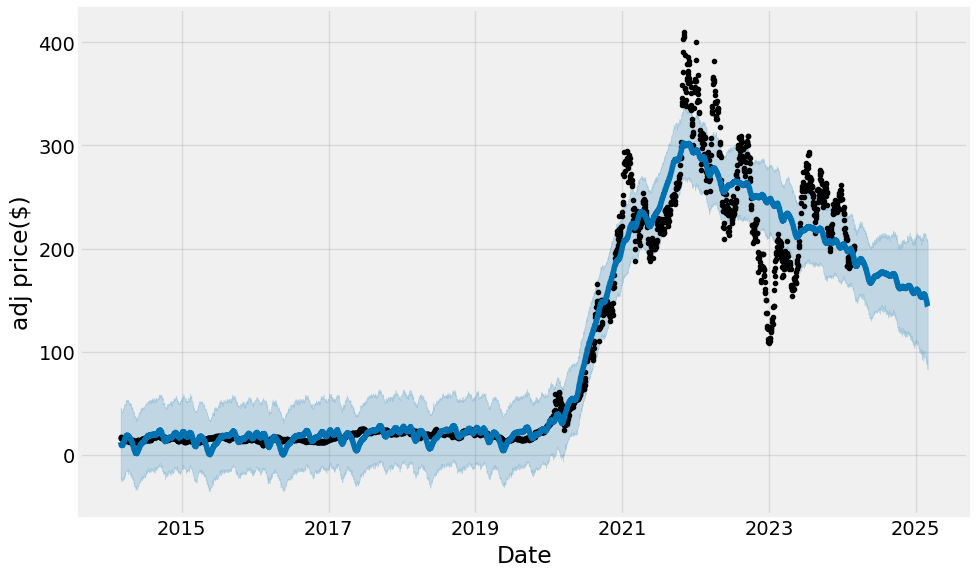

In [121]:
showmetheprophet('TSLA', 10000000)

##이 아래는 연습장 및 임정 튜터 블로그 따라한 것

In [31]:
#현재 날짜 입력 및 출력
from datetime import datetime
datetime.now()

datetime.datetime(2024, 3, 3, 9, 27, 41, 988998)

In [45]:
# 주식 데이터 가져오기 : 도요타

current_datetime = datetime.now().strftime("%Y-%m-%d")
toyota = yf.download('TYO', start='2014-03-01', end=current_datetime)

# 데이터 출력
#stock_data.to_csv("Toyota.csv")
toyota['ds'] = pd.to_datetime(toyota.index, format = '%Y-%m-%d')
toyota['y'] = toyota['Adj Close']
toyota = toyota[['ds', 'y']]
toyota

[*********************100%%**********************]  1 of 1 completed


,ds,y
Date,,
2014-03-03,2014-03-03,21.555035
2014-03-04,2014-03-04,22.036129
2014-03-05,2014-03-05,21.932360
2014-03-06,2014-03-06,22.168192
2014-03-07,2014-03-07,22.479492
...,...,...
2024-02-26,2024-02-26,14.440000
2024-02-27,2024-02-27,14.500000
2024-02-28,2024-02-28,14.310000


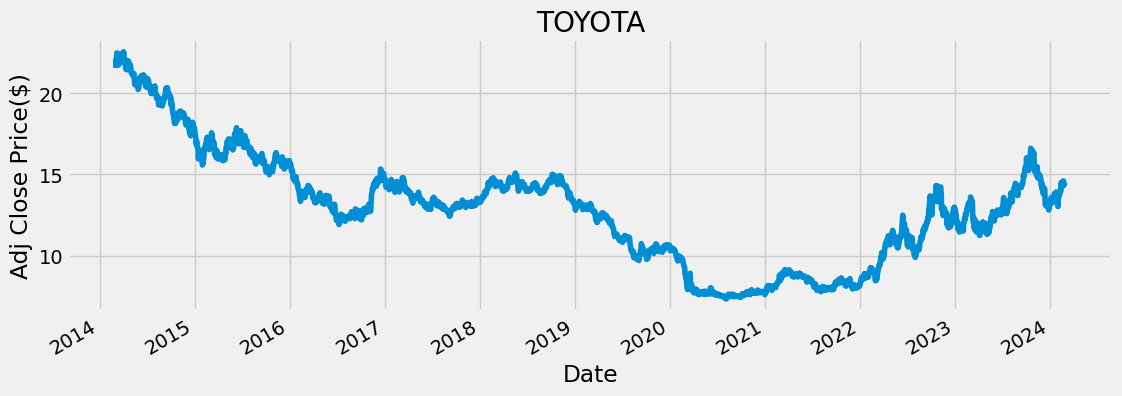

In [8]:
ax = toyota['y'].plot(title = 'TOYOTA', figsize = (12, 4))
ax.set_ylabel('Adj Close Price($)')
plt.show()

In [46]:
#모델 적합
model_prophet = Prophet(changepoint_prior_scale = 0.15, daily_seasonality = True)
model_prophet.fit(toyota)

#향후 1년간의 time stamp 생성

fcast_time = 365 #365일 예측
toyota_forecast = model_prophet.make_future_dataframe(periods = fcast_time, freq = 'D')
toyota_forecast.head(10)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpv573vt1y/26t5nbpk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv573vt1y/dgj18jyq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73989', 'data', 'file=/tmp/tmpv573vt1y/26t5nbpk.json', 'init=/tmp/tmpv573vt1y/dgj18jyq.json', 'output', 'file=/tmp/tmpv573vt1y/prophet_modela0j9_ie8/prophet_model-20240303095634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:56:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:56:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
0,2014-03-03
1,2014-03-04
2,2014-03-05
3,2014-03-06
4,2014-03-07
5,2014-03-10
6,2014-03-11
7,2014-03-12
8,2014-03-13
9,2014-03-14


In [58]:
#예측 결과 생성
toyota_forecast = model_prophet.predict(toyota_forecast)
toyota_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-03-03,22.648206,22.116660,23.269226
1,2014-03-04,22.619328,22.007780,23.226511
2,2014-03-05,22.572432,21.972322,23.142857
3,2014-03-06,22.541759,21.920583,23.125027
4,2014-03-07,22.504481,21.895353,23.108830


In [87]:
tq = toyota_forecast.query('ds == @current_datetime').iloc[0]['yhat']
tq

14.276526630942724

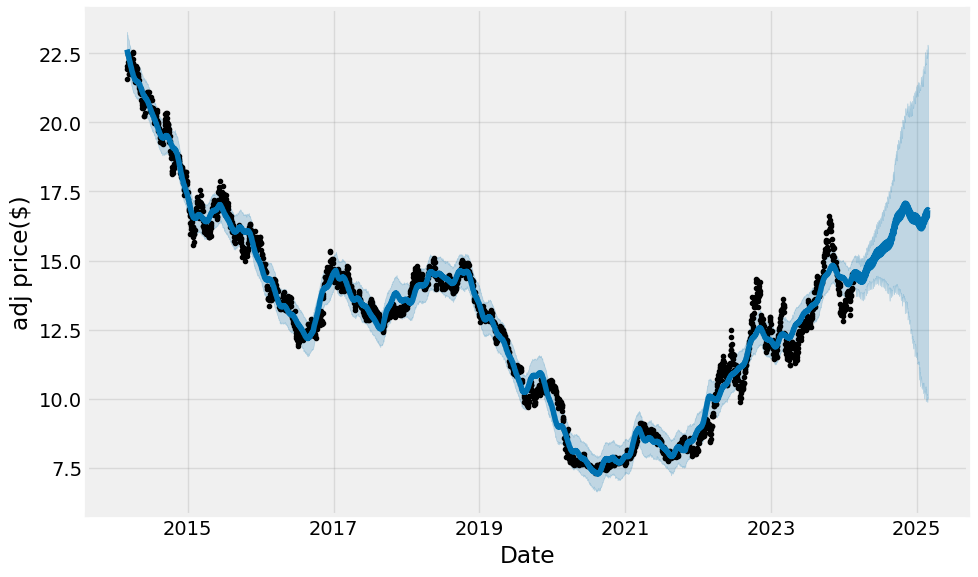

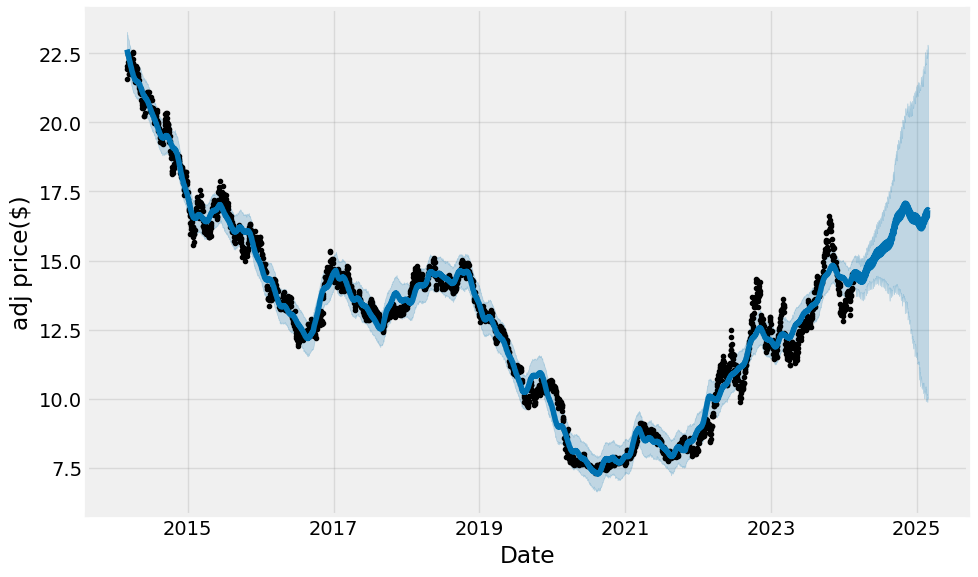

In [ ]:
#예측값 시각화
model_prophet.plot(toyota_forecast, xlabel = 'Date', ylabel= 'adj price($)')